# GEOS 518: Applied Hydrologic Modeling
## Problem Set 2: Autoregressive Models
### Matthew Patrolia

In this Jupyter notebook, I will read in my water levels dataset and perform any preprocessing needed, split the dataset into a "training" dataset used to estimate the parameters of the AR mode, and a "test" dataset against which I will test the model, and estimate the parameters of an AR(1) model using the training dataset. I will also compute the autocorrelation function, use the Yule-Walker equations to estimate the AR(1) parameters, use the statsmodel AR tools to estimate the parameters based on the dataset, and compare the YW parameters to those from the statsmodel library. I will then repeat these AR(1) processes for an AR(2) model. Finally, I will apply the AR(1) and AR(2) models to the "test" dataset and plot the modeled time series for the AR(1) and the AR(2) models against the observed time series for the time series. 

## 1. Import Libraries and Load Data

In [15]:
import pandas as pd  #import libraries
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as sm
from pandas.core import datetools

df= pd.read_pickle('Bastrop_WY2011-2017.pkl') #load .pkl from Assignment 1


WY= np.zeros(len(df['Y'].index))  #create an empty array that is full of zeros and equal to the number of days in the record

WY[df['M'].values < 10] = df['Y'].values[df['M'].values < 10] #for the records where the month is earlier than October 1, the water year is correct

WY[df['M'].values >= 10] = df['Y'].values[df['M'].values >= 10]+1 #for the records where the date is after October 1, water year is one more than the calendar year

df['WY'] = WY.astype(int) #save the water year as a column in the pandas data frame as an integer

qrows = np.concatenate([np.arange(0,10,1),np.arange(-11,-1,1)]) #print the first and last 10 records to make sure that the data is correct
df.iloc[qrows,:]


,Y,M,D,H,water_level(blsd),SerDates,WY
0,2010,10,1,0,216.49,2010-10-01 00:00:00,2011
1,2010,10,1,12,217.32,2010-10-01 12:00:00,2011
2,2010,10,2,0,216.78,2010-10-02 00:00:00,2011
3,2010,10,2,12,216.53,2010-10-02 12:00:00,2011
4,2010,10,3,0,216.32,2010-10-03 00:00:00,2011
5,2010,10,3,12,216.19,2010-10-03 12:00:00,2011
6,2010,10,4,0,216.05,2010-10-04 00:00:00,2011
7,2010,10,4,12,215.94,2010-10-04 12:00:00,2011
8,2010,10,5,0,215.81,2010-10-05 00:00:00,2011
9,2010,10,5,12,215.73,2010-10-05 12:00:00,2011


## 2. Split the dataframe into a training and a test portion

In [16]:
df_train = df[df.WY !=2017] #create training data equal to every year prior to 2017
df_test = df[df.WY ==2017] #creat the test data equal to the 2017 water year

## 3. Examine the structure of the Partial Autocorrelation Function in the Data

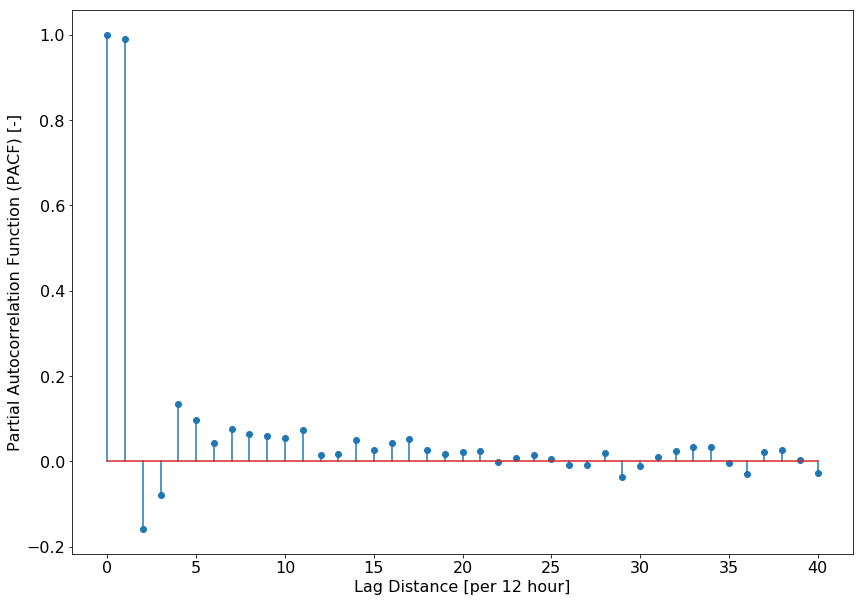

In [17]:
WLt = pd.Series(df_train['water_level(blsd)'].values, df_train['SerDates'].values) 

WLpacf = sm.pacf(WLt) #compute partial autocorrelation function


plt.figure(figsize=(14,10)) #plotting commands
plt.stem(WLpacf)
plt.ylabel('Partial Autocorrelation Function (PACF) [-]',fontsize=16)
plt.xlabel('Lag Distance [per 12 hour]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

from statsmodels.graphics.tsaplots import plot_pacf #import plot_pacf
f, axarr = plt.subplots(1, 1, figsize=(14,10)) #setting figure and axis attributes
_ = plot_pacf(WLt,method='ols',lags=40,ax=axarr.axes)
axarr.set_title('Statsmodel plot of PACF',fontsize=16)
axarr.set_ylabel('Partial Autocorrelation Function (PACF) [-]',fontsize=16)
axarr.set_xlabel('Lag Distance [per 12 hour]',fontsize=16)
axarr = plt.gca()
axarr.tick_params('both',labelsize=16)

## Fit AR(1) and AR(2) Models to the Data

In [18]:
WL_AR1_model = sm.AR(WLt).fit(1) #compute AR(1) phis using statsmodel
print(WL_AR1_model.params)

const    1.970209
L1.y     0.990907
dtype: float64


In [19]:
WL_AR2_model = sm.AR(WLt).fit(2) #compute AR(2) phi values using statsmodel
print(WL_AR2_model.params)

const    2.288012
L1.y     1.146156
L2.y    -0.156711
dtype: float64


## Yule Walker Estimation

In [20]:

#Computing the rho values for AR(1) model using autocorrelation values
WL = df['water_level(blsd)'].values
WLt   = WL[1:-1]
WLtm1 = WL[0:-2]
R = np.corrcoef(WLtm1,WLt) #computing the autocorrelation of 1 time step to calculate rho_1
rho_1 = R[1,0]





#Computing rho values for AR(2) model
WLt   = WL[2:-1]
WLtm2 = WL[0:-3]
R = np.corrcoef(WLtm2,WLt) #computing the autocorrelation of 2 time steps to calculate rho_2
rho_2 = R[1,0] 



YW2_phi2 = (rho_1**2-rho_2)/(rho_1**2 - 1) #using rho values to calculate phi_2 in AR(2)



YW2_phi1 = (1-((rho_1**2 - rho_2)/(rho_1**2 - 1)))*rho_1 #using rho values to calculate phi_1 for AR(1) model



print("Phi 1 calculated from Yule Walker for an AR(1) model is", rho_1, " and Phi 1 calculated from statsmodel for an AR(1) model is",WL_AR1_model.params[1])

print("Phi 1 calculated from Yule Walker for an AR(2) model is",YW2_phi1, " and Phi 1 calculated from statsmodel for an AR(2) model is",WL_AR2_model.params[1])

print("Phi 2 calculated from Yule Walker for an AR(2) model is",YW2_phi2, " and Phi 2 calculated from statsmodel for an AR(2) model is",WL_AR2_model.params[2])


Phi 1 calculated from Yule Walker for an AR(1) model is 0.992084913749  and Phi 1 calculated from statsmodel for an AR(1) model is 0.990907426658
Phi 1 calculated from Yule Walker for an AR(2) model is 1.14881979829  and Phi 1 calculated from statsmodel for an AR(2) model is 1.14615585015
Phi 2 calculated from Yule Walker for an AR(2) model is -0.157985352233  and Phi 2 calculated from statsmodel for an AR(2) model is -0.156711195828


## Use the Developed Model to make predictions of the test data

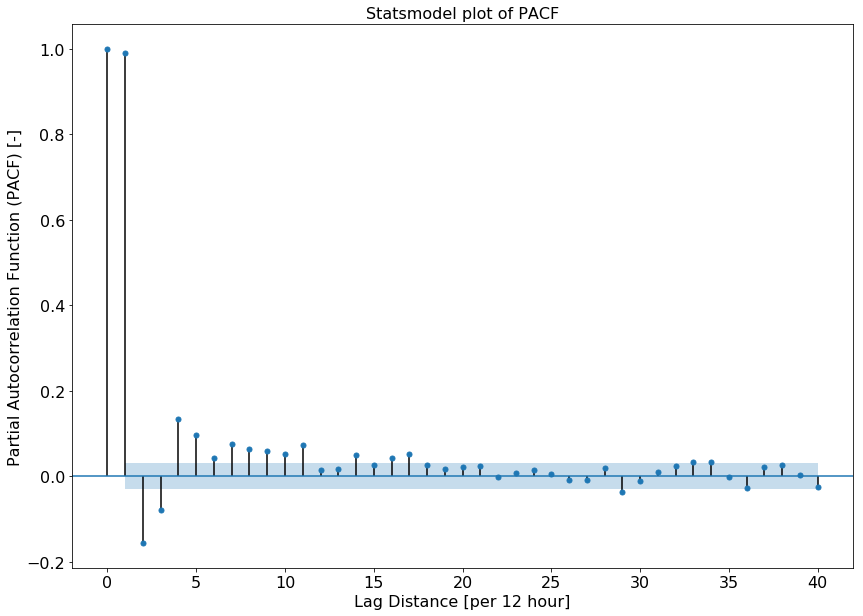

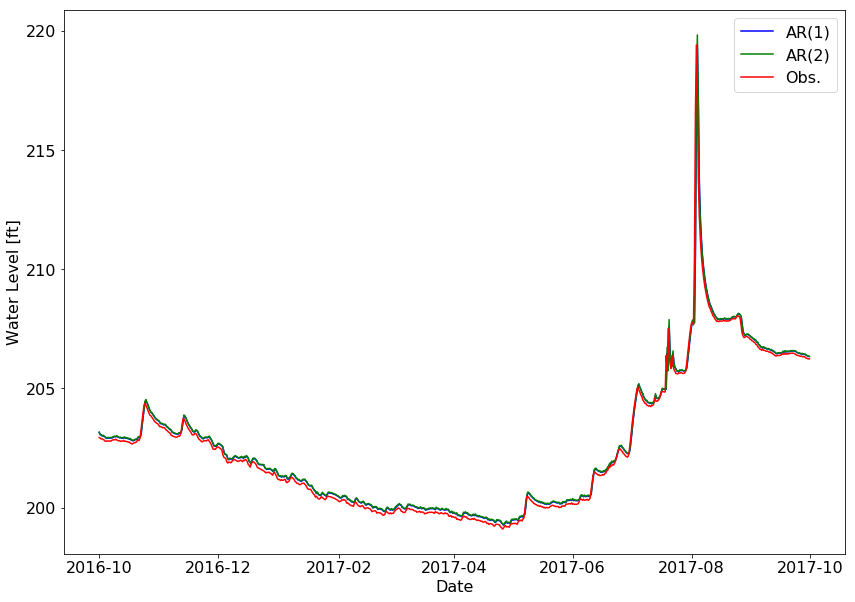

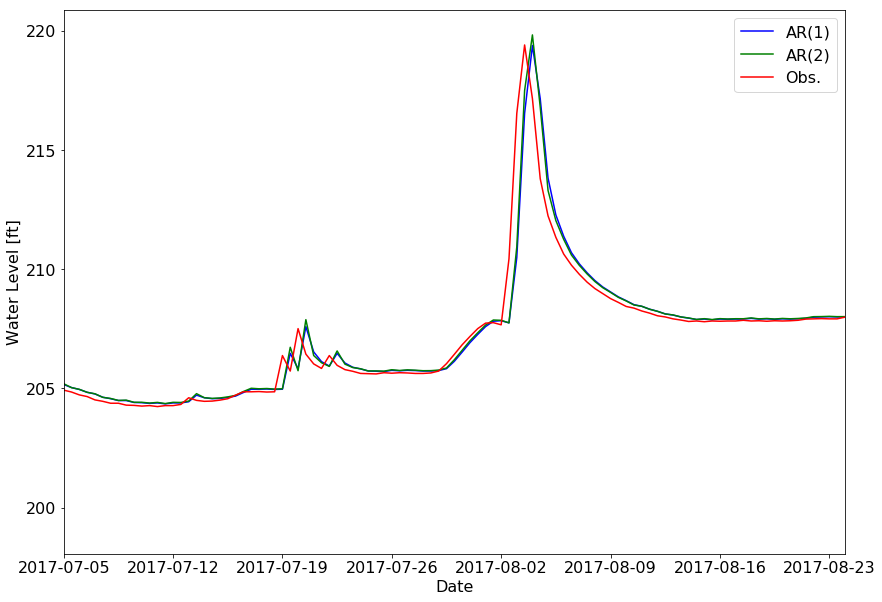

In [21]:
WLtrain = df_train['water_level(blsd)'].values #creating WLtrain array
WLtest = df_test['water_level(blsd)'].values #creating WLtest array
 
DatesTest = df_test['SerDates'].values #creates DatesTest array

WLttm1 = np.concatenate([WLtrain[-2:-1],WLtest[0:-1]]) 
WLttm2 = np.concatenate([WLtrain[-3:-1],WLtest[0:-2]])

#Compute mu and phi_1 for AR(1) Model
AR1_mu = WL_AR1_model.params[0]
AR1_phi1 = WL_AR1_model.params[1]

#Compute AR(1) Model for dataset
WLhatAR1 = AR1_mu + AR1_phi1*WLttm1

#Compute mu, phi_1, and phi_2 for AR(2) Model
AR2_mu = WL_AR2_model.params[0]
AR2_phi1 = WL_AR2_model.params[1]
AR2_phi2 = WL_AR2_model.params[2]

#Compute AR(2) Model for dataset
WLhatAR2 = AR2_mu + AR2_phi1*WLttm1 + AR2_phi2*WLttm2

plt.figure(figsize=(14,10)) #plot commands

plt.plot(DatesTest,WLhatAR1,'b-')
plt.plot(DatesTest,WLhatAR2,'g-')
plt.plot(DatesTest,WLtest,'r-')
plt.ylabel('Water Level [ft]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('AR(1)','AR(2)','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show() #show plot

plt.figure(figsize=(14,10))   #plot commands
plt.plot(DatesTest,WLhatAR1,'b-')
plt.plot(DatesTest,WLhatAR2,'g-')
plt.plot(DatesTest,WLtest,'r-')
plt.xlim([DatesTest[550],DatesTest[650]])
plt.ylabel('Water Level [ft]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('AR(1)','AR(2)','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show() #show plot

## Compare Predictions with observations

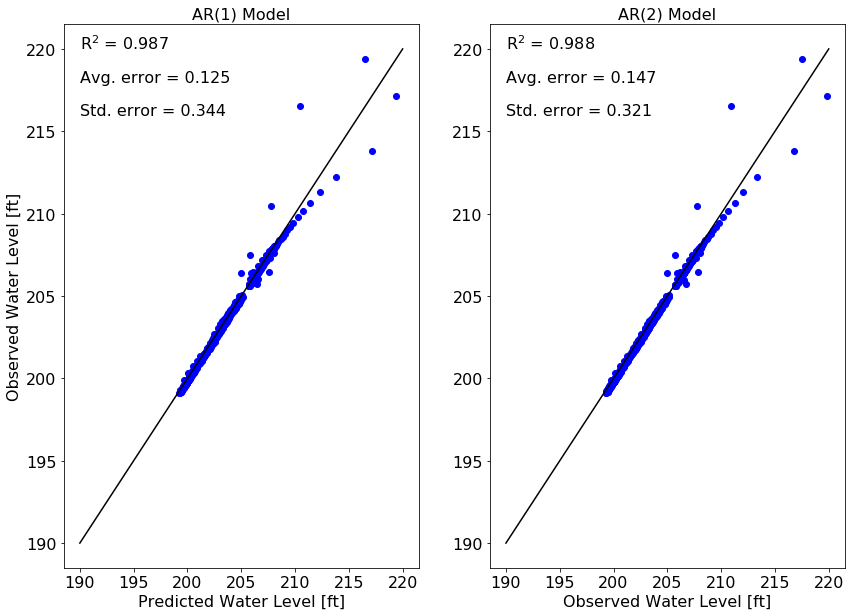

In [22]:
#compute R^2 values for each prediction
R2AR1 = np.corrcoef(WLhatAR1, WLtest)**2
R2AR2 = np.corrcoef(WLhatAR2, WLtest)**2
muAR1 = np.mean(WLhatAR1-WLtest)
stdAR1 = np.std(WLhatAR1-WLtest)
muAR2 = np.mean(WLhatAR2-WLtest)
stdAR2 = np.std(WLhatAR2-WLtest)


# Plot the AR(1) and AR(2) model results
plt.figure(figsize=(14,10))
plt.subplot(121)
plt.plot(WLhatAR1,WLtest,'bo')
plt.plot([190, 220], [190, 220], 'k-')          #plot commands
plt.title('AR(1) Model',fontsize=16)
plt.ylabel('Observed Water Level [ft]',fontsize=16)
plt.xlabel('Predicted Water Level [ft]',fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2AR1[0,1], xy=(190,220), fontsize=16)
ax.annotate('Avg. error = %.3f'%muAR1, xy=(190,218), fontsize=16)
ax.annotate('Std. error = %.3f'%stdAR1, xy=(190,216), fontsize=16)

plt.subplot(122)
plt.plot(WLhatAR2,WLtest,'bo')
plt.plot([190, 220], [190, 220], 'k-')
plt.title('AR(2) Model',fontsize=16)
plt.xlabel('Observed Water Level [ft]',fontsize=16)           #plot commands
ax = plt.gca()
ax.tick_params('both',labelsize=16)
ax.annotate('R${}^2$ = %.3f'%R2AR2[0,1], xy=(190,220), fontsize=16)
ax.annotate('Avg. error = %.3f'%muAR2, xy=(190,218), fontsize=16)
ax.annotate('Std. error = %.3f'%stdAR2, xy=(190,216), fontsize=16)

plt.show() #show plot

The AR (1) and the AR(2) models have very similar R^2, average error, and standard error values. I assume that this is because groundwater levels do not fluctuate much from day to day. My data was collected in half day (12 hour) increments, which the AR models do a good job of predicting.  I predict that I would start to see a decline in R^2 values after a week. 